# Method

### Import support packages

In [1]:
import os
import kagglehub
from IPython.display import clear_output


from DataGeneration import (
    get_season_mvp,
    collect_player_stats,
    load_combined_mvp_2001_2023,
    fetch_mvp_stats_by_year,
    check_missing_players,
    print_missing_players,
    get_player_season,
)

from DataProcessing import (
    get_iterable_window_data,
)

from DataExploration import (
    visualize_combined_sections,    
)

from DataModelling import (
    analyze_season_sections,
)

from DataFinalDisplay import (
    analyze_mvp_share_importance_over_time_sliding_windows
)

### make directories
player_data_path = 'Raw_player_data_sets'
window_player_path = 'windowed_data_sets'

os.makedirs(player_data_path, exist_ok=True)
os.makedirs(window_player_path, exist_ok=True)

custom_control_input = input("Do you want custom control? (yes/no): ").strip().lower()
custom_control = True if custom_control_input == 'yes' else False



/usr/lib/python3/dist-packages/pytz/__init__.py:31: SyntaxWarning: invalid escape sequence '\s'
  match = re.match("^#\s*version\s*([0-9a-z]*)\s*$", line)
/home/hammatime123/.local/lib/python3.12/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


### Fetch and save dataset

Yearly MVP results

In [2]:
mvp_data = load_combined_mvp_2001_2023()
players_by_year = mvp_data.groupby('year')['Player'].apply(list).to_dict()


fetch_mvp_stats_by_year(mvp_data, False, player_data_path, combined_mvp_data_path= "MVP_data-sets/combined_MVP_data_set.csv")

tempdic = check_missing_players(players_by_year,player_data_path)

2001 :  ['Allen Iverson', 'Tim Duncan', "Shaquille O'Neal", 'Chris Webber', 'Kevin Garnett', 'Tracy McGrady', 'Karl Malone', 'Jason Kidd', 'Kobe Bryant', 'David Robinson', 'Ray Allen', 'Vince Carter', 'Paul Pierce', 'Jerry Stackhouse', 'Michael Finley', 'Anthony Mason', 'John Stockton']
Data for year 2001 already exists at Raw_player_data_sets/mvp_stats_2001.csv. Checking formatting...
MVP Share data already present for year 2001. Skipping fetching...
2002 :  ['Tim Duncan', 'Jason Kidd', "Shaquille O'Neal", 'Tracy McGrady', 'Kobe Bryant', 'Gary Payton', 'Chris Webber', 'Dirk Nowitzki', 'Allen Iverson', 'Ben Wallace', 'Paul Pierce', 'Kevin Garnett', 'Michael Jordan', 'Steve Nash', 'Jerry Stackhouse', 'Mike Bibby', 'Elton Brand', 'Peja Stojaković']
Data for year 2002 already exists at Raw_player_data_sets/mvp_stats_2002.csv. Checking formatting...
MVP Share data already present for year 2002. Skipping fetching...
2003 :  ['Tim Duncan', 'Kevin Garnett', 'Kobe Bryant', 'Tracy McGrady', "Sh

### Missing player entries:

In [3]:
print_missing_players(tempdic)

Year 2001: 1 missing player(s)
Missing Players:
 - Shaquille O'Neal
----------------------------------------
Year 2002: 1 missing player(s)
Missing Players:
 - Shaquille O'Neal
----------------------------------------
Year 2003: 1 missing player(s)
Missing Players:
 - Shaquille O'Neal
----------------------------------------
Year 2004: 2 missing player(s)
Missing Players:
 - Jermaine O'Neal
 - Shaquille O'Neal
----------------------------------------
Year 2005: 2 missing player(s)
Missing Players:
 - Shaquille O'Neal
 - P.J. Brown
----------------------------------------
Year 2007: 1 missing player(s)
Missing Players:
 - Shaquille O'Neal
----------------------------------------


### generate windows and new data sets

In [4]:
get_iterable_window_data(players_by_year=players_by_year, data_path=player_data_path, mvp_data_path="MVP_data-sets/combined_MVP_data_set.csv")

<generator object get_iterable_window_data at 0x7f407eef5ea0>

### run to get visualisations of a given window
### remember to enter a number!

[[2001, 2002, 2003], [2002, 2003, 2004], [2003, 2004, 2005], [2004, 2005, 2006], [2005, 2006, 2007], [2006, 2007, 2008], [2007, 2008, 2009], [2008, 2009, 2010], [2009, 2010, 2011], [2010, 2011, 2012], [2011, 2012, 2013], [2012, 2013, 2014], [2013, 2014, 2015], [2014, 2015, 2016], [2015, 2016, 2017], [2016, 2017, 2018], [2017, 2018, 2019], [2018, 2019, 2020], [2019, 2020, 2021], [2020, 2021, 2022], [2021, 2022, 2023]]
21
Processing window with years: [2001, 2002, 2003]
Processing window with years: [2002, 2003, 2004]
Processing window with years: [2003, 2004, 2005]
Processing window with years: [2004, 2005, 2006]
Processing window with years: [2005, 2006, 2007]
Processing window with years: [2006, 2007, 2008]
Processing window with years: [2007, 2008, 2009]
Processing window with years: [2008, 2009, 2010]
Processing window with years: [2009, 2010, 2011]
Processing window with years: [2010, 2011, 2012]
Processing window with years: [2011, 2012, 2013]
Processing window with years: [2012, 

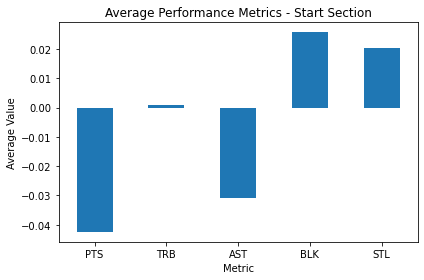

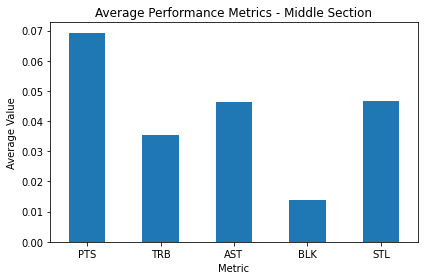

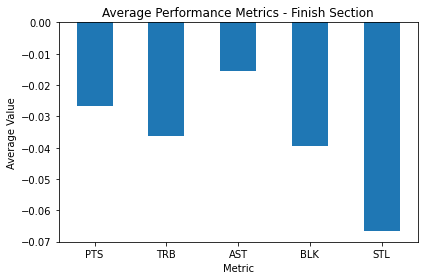

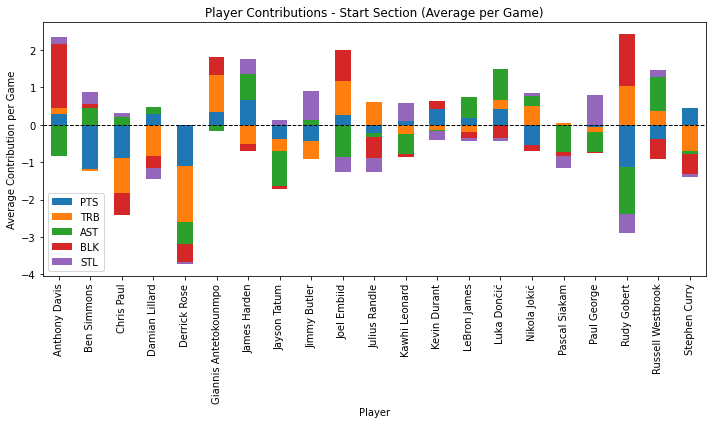

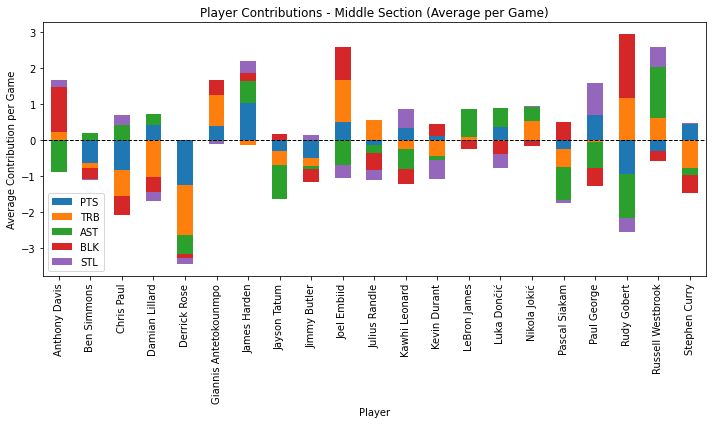

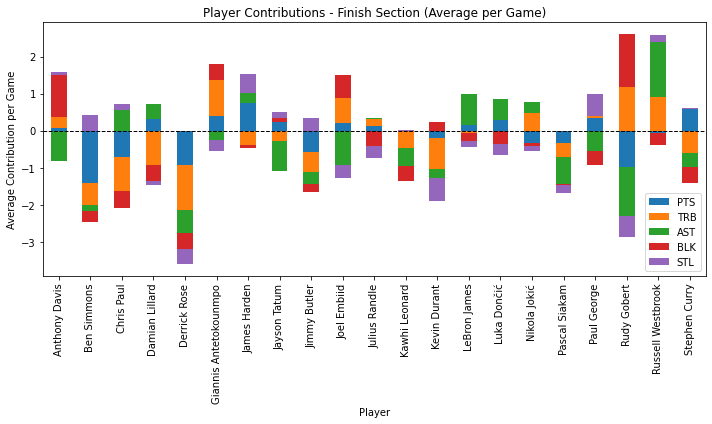

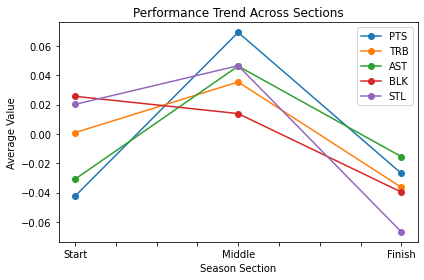

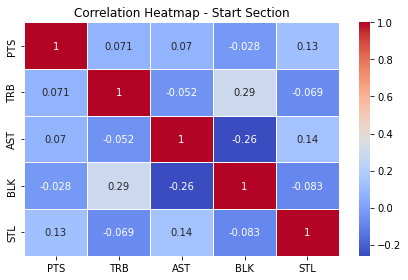

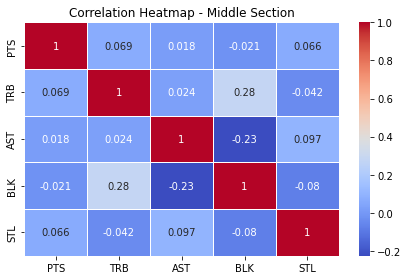

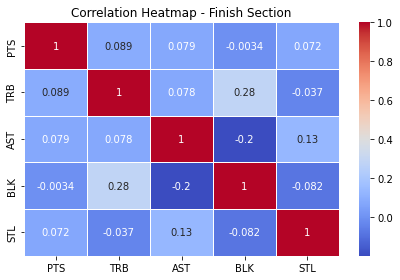

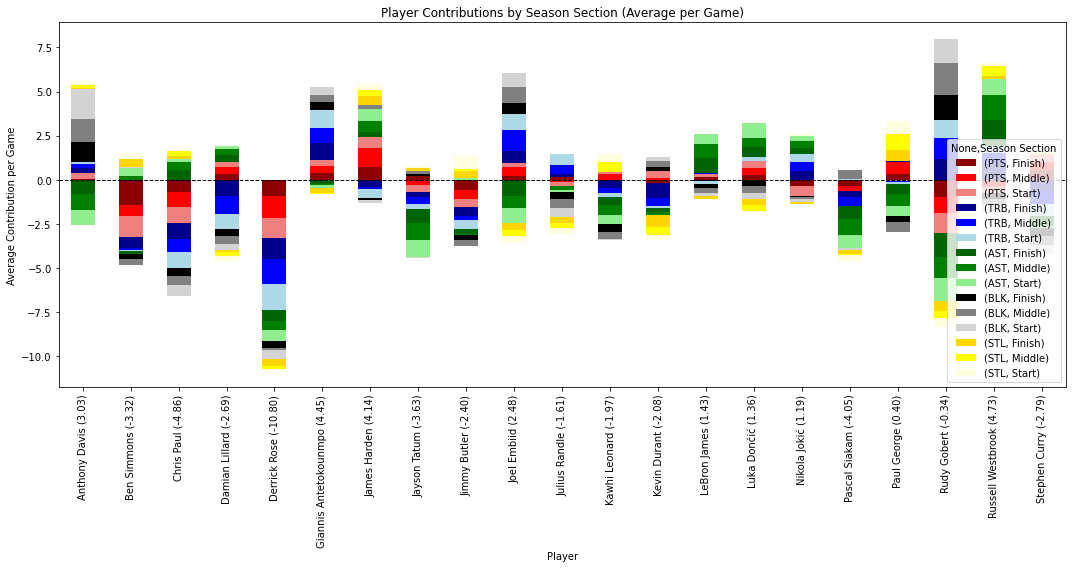

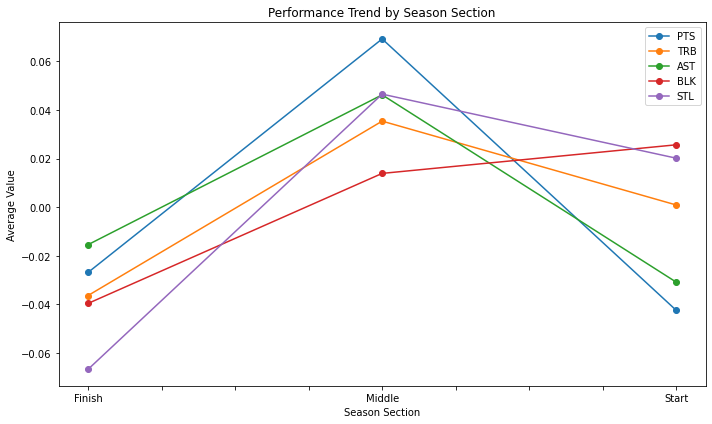

In [5]:
# Define player data path and players_by_year dictionary
player_data_path = 'Raw_player_data_sets'


if custom_control:
    # Get the iterator for window data, allow user to choose whether to split into sections or use full season
    split_choice = input("Do you want to split the season into start, middle, and finish sections? (yes/no): ").strip().lower()
    split_into_sections = True if split_choice == 'yes' else False
else:
    split_into_sections = True


# Get the iterator for window data
window_data_iterator = get_iterable_window_data(players_by_year, player_data_path, split_into_sections=split_into_sections,mvp_data_path="MVP_data-sets/combined_MVP_data_set.csv", return_aggregated=False)

# Convert the iterator to a list to allow indexing for selection
windows_data = list(window_data_iterator)


###
### un-comment for data exploration graphics
###

if custom_control:
    # List the available windows for selection
    for i, window in enumerate(windows_data):
        print(f"Window {i}: Years - {window['window_years']}")

    # Let the user choose a window
    selected_window_index = int(input("Enter the window number you want to visualize: "))
else:
    selected_window_index = 18



# Get the selected window's data
selected_window_data = windows_data[selected_window_index]

# Generate the visualizations for the selected window based on the user's choice
if split_into_sections:
    # Extract the combined sections
    combined_start_section = selected_window_data['combined_start_section']
    combined_middle_section = selected_window_data['combined_middle_section']
    combined_finish_section = selected_window_data['combined_finish_section']

    # Generate the visualizations for the selected window with divided sections
    visualize_combined_sections(
        start_section=combined_start_section,
        middle_section=combined_middle_section,
        finish_section=combined_finish_section,
        save_plots=True
    )



else:
    # Extract the combined season
    combined_season = selected_window_data['combined_season']
    # Generate the visualizations for the selected window with the full season
    visualize_combined_sections(combined_season=combined_season)


### Data modelling

In [6]:
### genrate new iterable to use
window_for_modelling = get_iterable_window_data(players_by_year, player_data_path, split_into_sections=True,mvp_data_path="MVP_data-sets/combined_MVP_data_set.csv", return_aggregated=False)

window_data_iterator = analyze_season_sections(window_for_modelling, verbose=False)
 


### gnerate trends

=== Starting MVP Share Importance Analysis Across Multiple Sliding Windows ===


[[2001, 2002, 2003], [2002, 2003, 2004], [2003, 2004, 2005], [2004, 2005, 2006], [2005, 2006, 2007], [2006, 2007, 2008], [2007, 2008, 2009], [2008, 2009, 2010], [2009, 2010, 2011], [2010, 2011, 2012], [2011, 2012, 2013], [2012, 2013, 2014], [2013, 2014, 2015], [2014, 2015, 2016], [2015, 2016, 2017], [2016, 2017, 2018], [2017, 2018, 2019], [2018, 2019, 2020], [2019, 2020, 2021], [2020, 2021, 2022], [2021, 2022, 2023]]
21
Processing window with years: [2001, 2002, 2003]
working on [2001, 2002, 2003]



=== Analyzing Window 1/21: 2001 ===
DataFrame Shape: (45, 6)
DataFrame Columns: ['Player', 'year', 'Share', 'Total_Basketball_Stats_start', 'Total_Basketball_Stats_middle', 'Total_Basketball_Stats_finish']
No missing values detected.
Training set size: 36 samples
Testing set size: 9 samples

--- Lasso Regression ---
Lasso R2 Score: 0.1788
Lasso Mean Squared Error: 0.0479
Lasso Coefficients:
  Total_Basketball_Stats_start: 0.0000
  Total_Basketball_Stats_middle: 0.0627
  Total_Basketball_Stats_finish: 0.0000

--- Ridge Regression ---
Ridge R2 Score: 0.0587
Ridge Mean Squared Error: 0.0549
Ridge Coefficients:
  Total_Basketball_Stats_start: -0.1203
  Total_Basketball_Stats_middle: 0.2527
  Total_Basketball_Stats_finish: 0.0070

--- Support Vector Regression (SVR) ---
Calculating Permutation Importances for SVR...
SVR R2 Score: 0.6235
SVR Mean Squared Error: 0.0219
SVR Permutation Feature Importances:
  Total_Basketball_Stats_start: 0.3835
  Total_Basketball_Stats_middle: 0.9479
  Total_


modes: Start: SVR -- Middle: Tree Regressor -- End: Tree Regressor

Processing window with years: [2002, 2003, 2004]
working on [2002, 2003, 2004]



=== Analyzing Window 2/21: 2002 ===
DataFrame Shape: (43, 6)
DataFrame Columns: ['Player', 'year', 'Share', 'Total_Basketball_Stats_start', 'Total_Basketball_Stats_middle', 'Total_Basketball_Stats_finish']
No missing values detected.
Training set size: 34 samples
Testing set size: 9 samples

--- Lasso Regression ---
Lasso R2 Score: 0.2876
Lasso Mean Squared Error: 0.0538
Lasso Coefficients:
  Total_Basketball_Stats_start: 0.0000
  Total_Basketball_Stats_middle: 0.0698
  Total_Basketball_Stats_finish: 0.0000

--- Ridge Regression ---
Ridge R2 Score: 0.4925
Ridge Mean Squared Error: 0.0383
Ridge Coefficients:
  Total_Basketball_Stats_start: -0.0105
  Total_Basketball_Stats_middle: 0.1345
  Total_Basketball_Stats_finish: 0.0539

--- Support Vector Regression (SVR) ---
Calculating Permutation Importances for SVR...
SVR R2 Score: 0.6017
SVR Mean Squared Error: 0.0301
SVR Permutation Feature Importances:
  Total_Basketball_Stats_start: 0.1694
  Total_Basketball_Stats_middle: 0.6749
  Total_


modes: Start: SVR -- Middle: Tree Regressor -- End: SVR

Processing window with years: [2003, 2004, 2005]
working on [2003, 2004, 2005]



=== Analyzing Window 3/21: 2003 ===
DataFrame Shape: (40, 6)
DataFrame Columns: ['Player', 'year', 'Share', 'Total_Basketball_Stats_start', 'Total_Basketball_Stats_middle', 'Total_Basketball_Stats_finish']
No missing values detected.
Training set size: 32 samples
Testing set size: 8 samples

--- Lasso Regression ---
Lasso R2 Score: -5.6675
Lasso Mean Squared Error: 0.0332
Lasso Coefficients:
  Total_Basketball_Stats_start: 0.0089
  Total_Basketball_Stats_middle: 0.0000
  Total_Basketball_Stats_finish: 0.0838

--- Ridge Regression ---
Ridge R2 Score: -13.5118
Ridge Mean Squared Error: 0.0722
Ridge Coefficients:
  Total_Basketball_Stats_start: 0.0671
  Total_Basketball_Stats_middle: 0.0039
  Total_Basketball_Stats_finish: 0.1360

--- Support Vector Regression (SVR) ---
Calculating Permutation Importances for SVR...
SVR R2 Score: -10.0269
SVR Mean Squared Error: 0.0549
SVR Permutation Feature Importances:
  Total_Basketball_Stats_start: -4.9234
  Total_Basketball_Stats_middle: -5.6415
  


modes: Start: SVR -- Middle: SVR -- End: SVR

Processing window with years: [2004, 2005, 2006]
working on [2004, 2005, 2006]



=== Analyzing Window 4/21: 2004 ===
DataFrame Shape: (39, 6)
DataFrame Columns: ['Player', 'year', 'Share', 'Total_Basketball_Stats_start', 'Total_Basketball_Stats_middle', 'Total_Basketball_Stats_finish']
No missing values detected.
Training set size: 31 samples
Testing set size: 8 samples

--- Lasso Regression ---
Lasso R2 Score: 0.1252
Lasso Mean Squared Error: 0.0646
Lasso Coefficients:
  Total_Basketball_Stats_start: 0.0000
  Total_Basketball_Stats_middle: 0.0291
  Total_Basketball_Stats_finish: 0.0000

--- Ridge Regression ---
Ridge R2 Score: 0.4918
Ridge Mean Squared Error: 0.0375
Ridge Coefficients:
  Total_Basketball_Stats_start: -0.0255
  Total_Basketball_Stats_middle: 0.1043
  Total_Basketball_Stats_finish: 0.0363

--- Support Vector Regression (SVR) ---
Calculating Permutation Importances for SVR...
SVR R2 Score: 0.8325
SVR Mean Squared Error: 0.0124
SVR Permutation Feature Importances:
  Total_Basketball_Stats_start: 0.0974
  Total_Basketball_Stats_middle: 0.5599
  Total_


modes: Start: SVR -- Middle: SVR -- End: SVR

Processing window with years: [2005, 2006, 2007]
working on [2005, 2006, 2007]



=== Analyzing Window 5/21: 2005 ===
DataFrame Shape: (41, 6)
DataFrame Columns: ['Player', 'year', 'Share', 'Total_Basketball_Stats_start', 'Total_Basketball_Stats_middle', 'Total_Basketball_Stats_finish']
No missing values detected.
Training set size: 32 samples
Testing set size: 9 samples

--- Lasso Regression ---
Lasso R2 Score: -0.3240
Lasso Mean Squared Error: 0.0375
Lasso Coefficients:
  Total_Basketball_Stats_start: 0.0000
  Total_Basketball_Stats_middle: 0.0000
  Total_Basketball_Stats_finish: 0.0221

--- Ridge Regression ---
Ridge R2 Score: -0.6117
Ridge Mean Squared Error: 0.0456
Ridge Coefficients:
  Total_Basketball_Stats_start: 0.0191
  Total_Basketball_Stats_middle: -0.0276
  Total_Basketball_Stats_finish: 0.1216

--- Support Vector Regression (SVR) ---
Calculating Permutation Importances for SVR...
SVR R2 Score: -1.2069
SVR Mean Squared Error: 0.0624
SVR Permutation Feature Importances:
  Total_Basketball_Stats_start: -0.1047
  Total_Basketball_Stats_middle: -0.2218
  T


modes: Start: SVR -- Middle: Tree Regressor -- End: SVR

Processing window with years: [2006, 2007, 2008]
working on [2006, 2007, 2008]



=== Analyzing Window 6/21: 2006 ===
DataFrame Shape: (44, 6)
DataFrame Columns: ['Player', 'year', 'Share', 'Total_Basketball_Stats_start', 'Total_Basketball_Stats_middle', 'Total_Basketball_Stats_finish']
No missing values detected.
Training set size: 35 samples
Testing set size: 9 samples

--- Lasso Regression ---
Lasso R2 Score: -0.1083
Lasso Mean Squared Error: 0.0962
Lasso Coefficients:
  Total_Basketball_Stats_start: 0.0000
  Total_Basketball_Stats_middle: 0.0000
  Total_Basketball_Stats_finish: 0.0000

--- Ridge Regression ---
Ridge R2 Score: 0.4414
Ridge Mean Squared Error: 0.0485
Ridge Coefficients:
  Total_Basketball_Stats_start: 0.0002
  Total_Basketball_Stats_middle: 0.0656
  Total_Basketball_Stats_finish: 0.0513

--- Support Vector Regression (SVR) ---
Calculating Permutation Importances for SVR...
SVR R2 Score: 0.6252
SVR Mean Squared Error: 0.0325
SVR Permutation Feature Importances:
  Total_Basketball_Stats_start: 0.0673
  Total_Basketball_Stats_middle: 0.5904
  Total_


modes: Start: SVR -- Middle: SVR -- End: Tree Regressor

Processing window with years: [2007, 2008, 2009]
working on [2007, 2008, 2009]



=== Analyzing Window 7/21: 2007 ===
DataFrame Shape: (45, 6)
DataFrame Columns: ['Player', 'year', 'Share', 'Total_Basketball_Stats_start', 'Total_Basketball_Stats_middle', 'Total_Basketball_Stats_finish']
No missing values detected.
Training set size: 36 samples
Testing set size: 9 samples

--- Lasso Regression ---
Lasso R2 Score: -0.2293
Lasso Mean Squared Error: 0.1601
Lasso Coefficients:
  Total_Basketball_Stats_start: 0.0000
  Total_Basketball_Stats_middle: 0.0000
  Total_Basketball_Stats_finish: 0.0000

--- Ridge Regression ---
Ridge R2 Score: 0.1685
Ridge Mean Squared Error: 0.1083
Ridge Coefficients:
  Total_Basketball_Stats_start: 0.0195
  Total_Basketball_Stats_middle: 0.0181
  Total_Basketball_Stats_finish: 0.0498

--- Support Vector Regression (SVR) ---
Calculating Permutation Importances for SVR...
SVR R2 Score: 0.0322
SVR Mean Squared Error: 0.1261
SVR Permutation Feature Importances:
  Total_Basketball_Stats_start: 0.3440
  Total_Basketball_Stats_middle: 0.1311
  Total_


modes: Start: SVR -- Middle: SVR -- End: SVR

Processing window with years: [2008, 2009, 2010]
working on [2008, 2009, 2010]



=== Analyzing Window 8/21: 2008 ===
DataFrame Shape: (44, 6)
DataFrame Columns: ['Player', 'year', 'Share', 'Total_Basketball_Stats_start', 'Total_Basketball_Stats_middle', 'Total_Basketball_Stats_finish']
No missing values detected.
Training set size: 35 samples
Testing set size: 9 samples

--- Lasso Regression ---
Lasso R2 Score: 0.2388
Lasso Mean Squared Error: 0.0688
Lasso Coefficients:
  Total_Basketball_Stats_start: 0.0000
  Total_Basketball_Stats_middle: 0.0791
  Total_Basketball_Stats_finish: 0.0296

--- Ridge Regression ---
Ridge R2 Score: 0.3456
Ridge Mean Squared Error: 0.0592
Ridge Coefficients:
  Total_Basketball_Stats_start: -0.0371
  Total_Basketball_Stats_middle: 0.1504
  Total_Basketball_Stats_finish: 0.1017

--- Support Vector Regression (SVR) ---
Calculating Permutation Importances for SVR...
SVR R2 Score: 0.5991
SVR Mean Squared Error: 0.0363
SVR Permutation Feature Importances:
  Total_Basketball_Stats_start: 0.3122
  Total_Basketball_Stats_middle: 0.3630
  Total_


modes: Start: Tree Regressor -- Middle: Tree Regressor -- End: Tree Regressor

Processing window with years: [2009, 2010, 2011]
working on [2009, 2010, 2011]



=== Analyzing Window 9/21: 2009 ===
DataFrame Shape: (40, 6)
DataFrame Columns: ['Player', 'year', 'Share', 'Total_Basketball_Stats_start', 'Total_Basketball_Stats_middle', 'Total_Basketball_Stats_finish']
No missing values detected.
Training set size: 32 samples
Testing set size: 8 samples

--- Lasso Regression ---
Lasso R2 Score: 0.2738
Lasso Mean Squared Error: 0.0661
Lasso Coefficients:
  Total_Basketball_Stats_start: 0.0000
  Total_Basketball_Stats_middle: 0.0579
  Total_Basketball_Stats_finish: 0.0299

--- Ridge Regression ---
Ridge R2 Score: 0.5119
Ridge Mean Squared Error: 0.0444
Ridge Coefficients:
  Total_Basketball_Stats_start: 0.0005
  Total_Basketball_Stats_middle: 0.1094
  Total_Basketball_Stats_finish: 0.0854

--- Support Vector Regression (SVR) ---
Calculating Permutation Importances for SVR...
SVR R2 Score: 0.7164
SVR Mean Squared Error: 0.0258
SVR Permutation Feature Importances:
  Total_Basketball_Stats_start: 0.2515
  Total_Basketball_Stats_middle: 0.8653
  Total_B


modes: Start: Tree Regressor -- Middle: Tree Regressor -- End: Tree Regressor

Processing window with years: [2010, 2011, 2012]
working on [2010, 2011, 2012]



=== Analyzing Window 10/21: 2010 ===
DataFrame Shape: (43, 6)
DataFrame Columns: ['Player', 'year', 'Share', 'Total_Basketball_Stats_start', 'Total_Basketball_Stats_middle', 'Total_Basketball_Stats_finish']
No missing values detected.
Training set size: 34 samples
Testing set size: 9 samples

--- Lasso Regression ---
Lasso R2 Score: 0.0717
Lasso Mean Squared Error: 0.0476
Lasso Coefficients:
  Total_Basketball_Stats_start: 0.0259
  Total_Basketball_Stats_middle: 0.0125
  Total_Basketball_Stats_finish: 0.0369

--- Ridge Regression ---
Ridge R2 Score: 0.1751
Ridge Mean Squared Error: 0.0423
Ridge Coefficients:
  Total_Basketball_Stats_start: 0.0759
  Total_Basketball_Stats_middle: 0.0311
  Total_Basketball_Stats_finish: 0.0873

--- Support Vector Regression (SVR) ---
Calculating Permutation Importances for SVR...
SVR R2 Score: 0.0626
SVR Mean Squared Error: 0.0481
SVR Permutation Feature Importances:
  Total_Basketball_Stats_start: -0.0369
  Total_Basketball_Stats_middle: -0.0133
  Tota


modes: Start: Tree Regressor -- Middle: Tree Regressor -- End: Tree Regressor

Processing window with years: [2011, 2012, 2013]
working on [2011, 2012, 2013]



=== Analyzing Window 11/21: 2011 ===
DataFrame Shape: (44, 6)
DataFrame Columns: ['Player', 'year', 'Share', 'Total_Basketball_Stats_start', 'Total_Basketball_Stats_middle', 'Total_Basketball_Stats_finish']
No missing values detected.
Training set size: 35 samples
Testing set size: 9 samples

--- Lasso Regression ---
Lasso R2 Score: -0.2236
Lasso Mean Squared Error: 0.0275
Lasso Coefficients:
  Total_Basketball_Stats_start: 0.0461
  Total_Basketball_Stats_middle: 0.0324
  Total_Basketball_Stats_finish: 0.0056

--- Ridge Regression ---
Ridge R2 Score: -0.5738
Ridge Mean Squared Error: 0.0354
Ridge Coefficients:
  Total_Basketball_Stats_start: 0.0485
  Total_Basketball_Stats_middle: 0.1093
  Total_Basketball_Stats_finish: 0.0833

--- Support Vector Regression (SVR) ---
Calculating Permutation Importances for SVR...
SVR R2 Score: -1.6550
SVR Mean Squared Error: 0.0596
SVR Permutation Feature Importances:
  Total_Basketball_Stats_start: -1.3319
  Total_Basketball_Stats_middle: -0.9800
  T


modes: Start: Tree Regressor -- Middle: SVR -- End: SVR

Processing window with years: [2012, 2013, 2014]
working on [2012, 2013, 2014]



=== Analyzing Window 12/21: 2012 ===
DataFrame Shape: (48, 6)
DataFrame Columns: ['Player', 'year', 'Share', 'Total_Basketball_Stats_start', 'Total_Basketball_Stats_middle', 'Total_Basketball_Stats_finish']
No missing values detected.
Training set size: 38 samples
Testing set size: 10 samples

--- Lasso Regression ---
Lasso R2 Score: -1.5149
Lasso Mean Squared Error: 0.0345
Lasso Coefficients:
  Total_Basketball_Stats_start: 0.0000
  Total_Basketball_Stats_middle: 0.0766
  Total_Basketball_Stats_finish: 0.0326

--- Ridge Regression ---
Ridge R2 Score: -4.1675
Ridge Mean Squared Error: 0.0709
Ridge Coefficients:
  Total_Basketball_Stats_start: -0.0061
  Total_Basketball_Stats_middle: 0.1344
  Total_Basketball_Stats_finish: 0.0911

--- Support Vector Regression (SVR) ---
Calculating Permutation Importances for SVR...
SVR R2 Score: -5.6595
SVR Mean Squared Error: 0.0914
SVR Permutation Feature Importances:
  Total_Basketball_Stats_start: -1.8496
  Total_Basketball_Stats_middle: -2.1929
 


modes: Start: SVR -- Middle: SVR -- End: Tree Regressor

Processing window with years: [2013, 2014, 2015]
working on [2013, 2014, 2015]



=== Analyzing Window 13/21: 2013 ===
DataFrame Shape: (45, 6)
DataFrame Columns: ['Player', 'year', 'Share', 'Total_Basketball_Stats_start', 'Total_Basketball_Stats_middle', 'Total_Basketball_Stats_finish']
No missing values detected.
Training set size: 36 samples
Testing set size: 9 samples

--- Lasso Regression ---
Lasso R2 Score: 0.1214
Lasso Mean Squared Error: 0.0155
Lasso Coefficients:
  Total_Basketball_Stats_start: 0.0000
  Total_Basketball_Stats_middle: 0.1149
  Total_Basketball_Stats_finish: 0.0000

--- Ridge Regression ---
Ridge R2 Score: -0.1700
Ridge Mean Squared Error: 0.0206
Ridge Coefficients:
  Total_Basketball_Stats_start: -0.0212
  Total_Basketball_Stats_middle: 0.2240
  Total_Basketball_Stats_finish: 0.0027

--- Support Vector Regression (SVR) ---
Calculating Permutation Importances for SVR...
SVR R2 Score: -0.3776
SVR Mean Squared Error: 0.0243
SVR Permutation Feature Importances:
  Total_Basketball_Stats_start: -0.0721
  Total_Basketball_Stats_middle: 0.1537
  To


modes: Start: SVR -- Middle: SVR -- End: SVR

Processing window with years: [2014, 2015, 2016]
working on [2014, 2015, 2016]



=== Analyzing Window 14/21: 2014 ===
DataFrame Shape: (39, 6)
DataFrame Columns: ['Player', 'year', 'Share', 'Total_Basketball_Stats_start', 'Total_Basketball_Stats_middle', 'Total_Basketball_Stats_finish']
No missing values detected.
Training set size: 31 samples
Testing set size: 8 samples

--- Lasso Regression ---
Lasso R2 Score: 0.1669
Lasso Mean Squared Error: 0.0552
Lasso Coefficients:
  Total_Basketball_Stats_start: 0.0084
  Total_Basketball_Stats_middle: 0.0018
  Total_Basketball_Stats_finish: 0.0434

--- Ridge Regression ---
Ridge R2 Score: 0.3543
Ridge Mean Squared Error: 0.0427
Ridge Coefficients:
  Total_Basketball_Stats_start: 0.0618
  Total_Basketball_Stats_middle: 0.0455
  Total_Basketball_Stats_finish: 0.0703

--- Support Vector Regression (SVR) ---
Calculating Permutation Importances for SVR...
SVR R2 Score: 0.3053
SVR Mean Squared Error: 0.0460
SVR Permutation Feature Importances:
  Total_Basketball_Stats_start: 0.1333
  Total_Basketball_Stats_middle: 0.2094
  Total_


modes: Start: Tree Regressor -- Middle: SVR -- End: SVR

Processing window with years: [2015, 2016, 2017]
working on [2015, 2016, 2017]



=== Analyzing Window 15/21: 2015 ===
DataFrame Shape: (33, 6)
DataFrame Columns: ['Player', 'year', 'Share', 'Total_Basketball_Stats_start', 'Total_Basketball_Stats_middle', 'Total_Basketball_Stats_finish']
No missing values detected.
Training set size: 26 samples
Testing set size: 7 samples

--- Lasso Regression ---
Lasso R2 Score: -0.4646
Lasso Mean Squared Error: 0.0386
Lasso Coefficients:
  Total_Basketball_Stats_start: 0.0844
  Total_Basketball_Stats_middle: 0.0011
  Total_Basketball_Stats_finish: 0.0000

--- Ridge Regression ---
Ridge R2 Score: -1.2230
Ridge Mean Squared Error: 0.0587
Ridge Coefficients:
  Total_Basketball_Stats_start: 0.1715
  Total_Basketball_Stats_middle: 0.0978
  Total_Basketball_Stats_finish: -0.0865

--- Support Vector Regression (SVR) ---
Calculating Permutation Importances for SVR...
SVR R2 Score: -0.6466
SVR Mean Squared Error: 0.0435
SVR Permutation Feature Importances:
  Total_Basketball_Stats_start: -0.1535
  Total_Basketball_Stats_middle: 0.1563
  T


modes: Start: SVR -- Middle: SVR -- End: SVR

Processing window with years: [2016, 2017, 2018]
working on [2016, 2017, 2018]



=== Analyzing Window 16/21: 2016 ===
DataFrame Shape: (34, 6)
DataFrame Columns: ['Player', 'year', 'Share', 'Total_Basketball_Stats_start', 'Total_Basketball_Stats_middle', 'Total_Basketball_Stats_finish']
No missing values detected.
Training set size: 27 samples
Testing set size: 7 samples

--- Lasso Regression ---
Lasso R2 Score: 0.3571
Lasso Mean Squared Error: 0.0434
Lasso Coefficients:
  Total_Basketball_Stats_start: 0.0422
  Total_Basketball_Stats_middle: 0.0000
  Total_Basketball_Stats_finish: 0.0470

--- Ridge Regression ---
Ridge R2 Score: 0.7861
Ridge Mean Squared Error: 0.0144
Ridge Coefficients:
  Total_Basketball_Stats_start: 0.1308
  Total_Basketball_Stats_middle: -0.0876
  Total_Basketball_Stats_finish: 0.1518

--- Support Vector Regression (SVR) ---
Calculating Permutation Importances for SVR...
SVR R2 Score: 0.2269
SVR Mean Squared Error: 0.0522
SVR Permutation Feature Importances:
  Total_Basketball_Stats_start: 0.4225
  Total_Basketball_Stats_middle: 0.0104
  Total


modes: Start: SVR -- Middle: Tree Regressor -- End: Tree Regressor

Processing window with years: [2017, 2018, 2019]
working on [2017, 2018, 2019]



=== Analyzing Window 17/21: 2017 ===
DataFrame Shape: (36, 6)
DataFrame Columns: ['Player', 'year', 'Share', 'Total_Basketball_Stats_start', 'Total_Basketball_Stats_middle', 'Total_Basketball_Stats_finish']
No missing values detected.
Training set size: 28 samples
Testing set size: 8 samples

--- Lasso Regression ---
Lasso R2 Score: -0.0123
Lasso Mean Squared Error: 0.0619
Lasso Coefficients:
  Total_Basketball_Stats_start: 0.0000
  Total_Basketball_Stats_middle: 0.0687
  Total_Basketball_Stats_finish: 0.0669

--- Ridge Regression ---
Ridge R2 Score: -0.6287
Ridge Mean Squared Error: 0.0996
Ridge Coefficients:
  Total_Basketball_Stats_start: 0.0353
  Total_Basketball_Stats_middle: 0.1061
  Total_Basketball_Stats_finish: 0.1011

--- Support Vector Regression (SVR) ---
Calculating Permutation Importances for SVR...
SVR R2 Score: -2.4652
SVR Mean Squared Error: 0.2118
SVR Permutation Feature Importances:
  Total_Basketball_Stats_start: -0.6625
  Total_Basketball_Stats_middle: -0.7940
  T


modes: Start: SVR -- Middle: SVR -- End: SVR

Processing window with years: [2018, 2019, 2020]
working on [2018, 2019, 2020]



=== Analyzing Window 18/21: 2018 ===
DataFrame Shape: (37, 6)
DataFrame Columns: ['Player', 'year', 'Share', 'Total_Basketball_Stats_start', 'Total_Basketball_Stats_middle', 'Total_Basketball_Stats_finish']
No missing values detected.
Training set size: 29 samples
Testing set size: 8 samples

--- Lasso Regression ---
Lasso R2 Score: 0.3148
Lasso Mean Squared Error: 0.0367
Lasso Coefficients:
  Total_Basketball_Stats_start: 0.0000
  Total_Basketball_Stats_middle: 0.0904
  Total_Basketball_Stats_finish: 0.0000



modes: Start: SVR -- Middle: Tree Regressor -- End: SVR



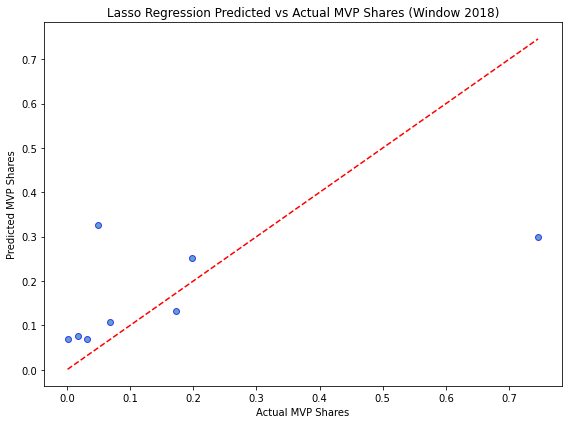


--- Ridge Regression ---
Ridge R2 Score: 0.1967
Ridge Mean Squared Error: 0.0430
Ridge Coefficients:
  Total_Basketball_Stats_start: 0.0246
  Total_Basketball_Stats_middle: 0.1620
  Total_Basketball_Stats_finish: 0.0034


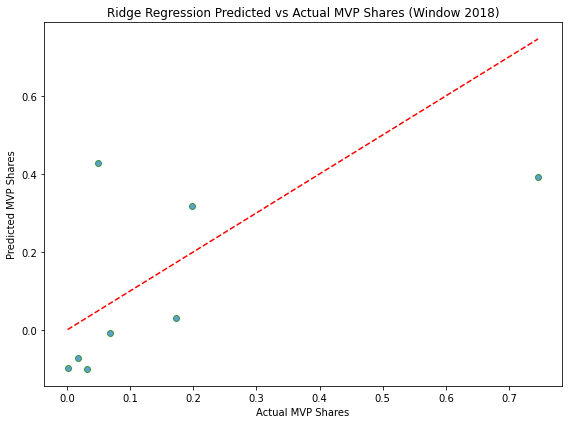


--- Support Vector Regression (SVR) ---
Calculating Permutation Importances for SVR...
SVR R2 Score: -0.6769
SVR Mean Squared Error: 0.0897
SVR Permutation Feature Importances:
  Total_Basketball_Stats_start: -0.3644
  Total_Basketball_Stats_middle: -0.0743
  Total_Basketball_Stats_finish: -0.5159


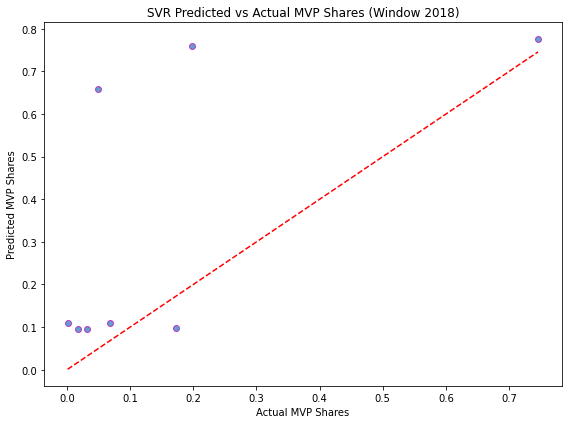


--- Random Forest Regressor ---
Random Forest R2 Score: -0.3733
Random Forest Mean Squared Error: 0.0735
Random Forest Feature Importances:
  Total_Basketball_Stats_start: 0.1468
  Total_Basketball_Stats_middle: 0.6736
  Total_Basketball_Stats_finish: 0.1796


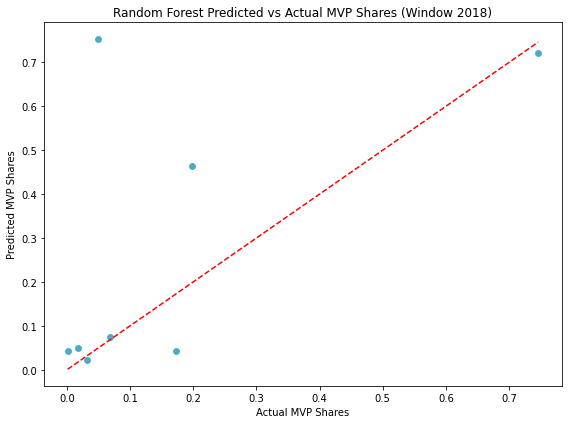

Window '2018' Analysis Complete.



Processing window with years: [2019, 2020, 2021]
working on [2019, 2020, 2021]



=== Analyzing Window 19/21: 2019 ===
DataFrame Shape: (39, 6)
DataFrame Columns: ['Player', 'year', 'Share', 'Total_Basketball_Stats_start', 'Total_Basketball_Stats_middle', 'Total_Basketball_Stats_finish']
No missing values detected.
Training set size: 31 samples
Testing set size: 8 samples

--- Lasso Regression ---
Lasso R2 Score: 0.0224
Lasso Mean Squared Error: 0.0922
Lasso Coefficients:
  Total_Basketball_Stats_start: 0.0084
  Total_Basketball_Stats_middle: 0.0648
  Total_Basketball_Stats_finish: 0.0000

--- Ridge Regression ---
Ridge R2 Score: 0.0368
Ridge Mean Squared Error: 0.0909
Ridge Coefficients:
  Total_Basketball_Stats_start: 0.0528
  Total_Basketball_Stats_middle: 0.1179
  Total_Basketball_Stats_finish: 0.0350

--- Support Vector Regression (SVR) ---
Calculating Permutation Importances for SVR...
SVR R2 Score: 0.3844
SVR Mean Squared Error: 0.0581
SVR Permutation Feature Importances:
  Total_Basketball_Stats_start: 0.5821
  Total_Basketball_Stats_middle: 0.1544
  Total_


modes: Start: SVR -- Middle: SVR -- End: SVR

Processing window with years: [2020, 2021, 2022]
working on [2020, 2021, 2022]



=== Analyzing Window 20/21: 2020 ===
DataFrame Shape: (39, 6)
DataFrame Columns: ['Player', 'year', 'Share', 'Total_Basketball_Stats_start', 'Total_Basketball_Stats_middle', 'Total_Basketball_Stats_finish']
No missing values detected.
Training set size: 31 samples
Testing set size: 8 samples

--- Lasso Regression ---
Lasso R2 Score: 0.0689
Lasso Mean Squared Error: 0.0749
Lasso Coefficients:
  Total_Basketball_Stats_start: 0.0000
  Total_Basketball_Stats_middle: 0.0141
  Total_Basketball_Stats_finish: 0.0834

--- Ridge Regression ---
Ridge R2 Score: -0.2574
Ridge Mean Squared Error: 0.1011
Ridge Coefficients:
  Total_Basketball_Stats_start: -0.0221
  Total_Basketball_Stats_middle: 0.0916
  Total_Basketball_Stats_finish: 0.1470

--- Support Vector Regression (SVR) ---
Calculating Permutation Importances for SVR...
SVR R2 Score: 0.3170
SVR Mean Squared Error: 0.0549
SVR Permutation Feature Importances:
  Total_Basketball_Stats_start: 0.3993
  Total_Basketball_Stats_middle: 0.1057
  Tota


modes: Start: SVR -- Middle: SVR -- End: Tree Regressor

Processing window with years: [2021, 2022, 2023]
working on [2021, 2022, 2023]



=== Analyzing Window 21/21: 2021 ===
DataFrame Shape: (40, 6)
DataFrame Columns: ['Player', 'year', 'Share', 'Total_Basketball_Stats_start', 'Total_Basketball_Stats_middle', 'Total_Basketball_Stats_finish']
No missing values detected.
Training set size: 32 samples
Testing set size: 8 samples

--- Lasso Regression ---
Lasso R2 Score: 0.1752
Lasso Mean Squared Error: 0.0441
Lasso Coefficients:
  Total_Basketball_Stats_start: 0.0362
  Total_Basketball_Stats_middle: 0.0573
  Total_Basketball_Stats_finish: 0.0000

--- Ridge Regression ---
Ridge R2 Score: 0.2582
Ridge Mean Squared Error: 0.0396
Ridge Coefficients:
  Total_Basketball_Stats_start: 0.0863
  Total_Basketball_Stats_middle: 0.0785
  Total_Basketball_Stats_finish: 0.0323

--- Support Vector Regression (SVR) ---
Calculating Permutation Importances for SVR...
SVR R2 Score: 0.5129
SVR Mean Squared Error: 0.0260
SVR Permutation Feature Importances:
  Total_Basketball_Stats_start: 0.3571
  Total_Basketball_Stats_middle: 0.2926
  Total_


modes: Start: SVR -- Middle: SVR -- End: SVR



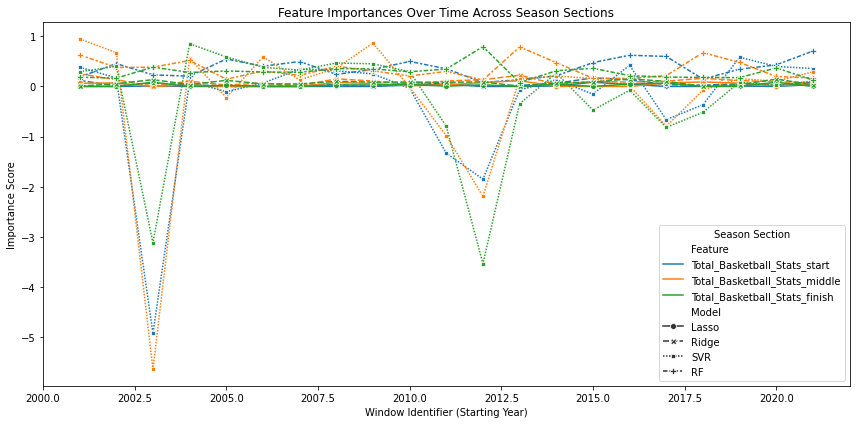


=== Summary of Findings ===

Most Important Features Per Window:
    Window         Most_Important_Feature
0     2001  Total_Basketball_Stats_middle
1     2002  Total_Basketball_Stats_middle
2     2003  Total_Basketball_Stats_finish
3     2004  Total_Basketball_Stats_middle
4     2005  Total_Basketball_Stats_finish
5     2006  Total_Basketball_Stats_middle
6     2007   Total_Basketball_Stats_start
7     2008  Total_Basketball_Stats_middle
8     2009  Total_Basketball_Stats_middle
9     2010  Total_Basketball_Stats_finish
10    2011  Total_Basketball_Stats_finish
11    2012   Total_Basketball_Stats_start
12    2013  Total_Basketball_Stats_middle
13    2014  Total_Basketball_Stats_middle
14    2015   Total_Basketball_Stats_start
15    2016   Total_Basketball_Stats_start
16    2017   Total_Basketball_Stats_start
17    2018  Total_Basketball_Stats_middle
18    2019   Total_Basketball_Stats_start
19    2020   Total_Basketball_Stats_start
20    2021   Total_Basketball_Stats_start

Overall A

In [7]:
# Your list of overlapping windows
windows = [
    [2001, 2002, 2003],
    [2002, 2003, 2004],
    [2003, 2004, 2005],
    [2004, 2005, 2006],
    [2005, 2006, 2007],
    [2006, 2007, 2008],
    [2007, 2008, 2009],
    [2008, 2009, 2010],
    [2009, 2010, 2011],
    [2010, 2011, 2012],
    [2011, 2012, 2013],
    [2012, 2013, 2014],
    [2013, 2014, 2015],
    [2014, 2015, 2016],
    [2015, 2016, 2017],
    [2016, 2017, 2018],
    [2017, 2018, 2019],
    [2018, 2019, 2020],
    [2019, 2020, 2021],
    [2020, 2021, 2022],
    [2021, 2022, 2023]
]

# Generate window_identifiers using the starting year of each window
window_identifiers = [window[0] for window in windows]

feature_importances_over_time, stat_results_df = analyze_mvp_share_importance_over_time_sliding_windows(
    window_data_iterator=window_data_iterator,
    window_identifiers=window_identifiers,
    verbose=True,
    plot_trends=True,
    plot_predictions=[2018],
    test_size=0.2,
    random_state=42
)